In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True) 

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/More_topics/topic_02_fraud_detection'

/content/gdrive/My Drive/More_topics/topic_02_fraud_detection


In [ ]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
# Sklearn's preprocessing library
from sklearn.preprocessing import StandardScaler
# Importing train and test data split
from sklearn.model_selection import train_test_split
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Setting theme style and color palette to seaborn 
sns.set_theme(context = 'notebook', style='darkgrid',palette='dark')

###Đọc data

In [ ]:
# Obtaining data
df = pd.read_csv('creditcard_01.csv')
# Display dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Verifying data types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Verifying if there are any NaN-Not a Number value
df.isna().values.any()

False

In [ ]:
# Statistic information regarding amounts
df.Amount.describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

Nhận xét:
**75%** giao dịch trong khoảng thời gian được phân tích € 77,16.<br><br>
Số tiền tối đa được xác định trong khoảng thời gian này là € 25.691,16, cao hơn nhiều so với số tiền trung bình là € 88,35.

In [ ]:
# Visualizing distribution of amounts
fig = px.scatter(df, x = 'Amount', y =df.index, color = df.Class,
                title = 'Distribution of Amount Values')
fig.update_layout(xaxis_title='Transaction Amount (in €)',
                    yaxis_title='Transactions')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Sorting fraudulent transactions by amount
df.query("Class == 1").sort_values('Amount', ascending = False)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176049,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
249167,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1
89190,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.00,1
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.00,1


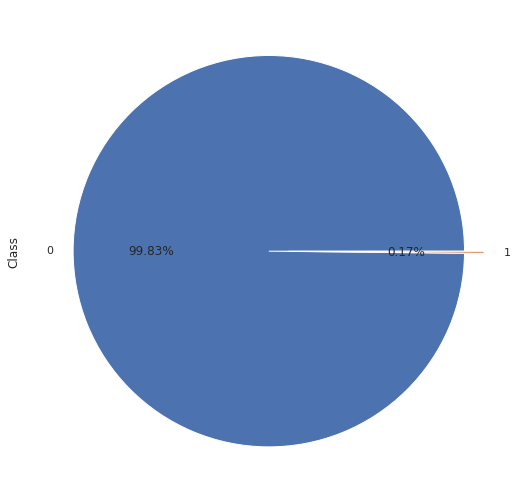

In [ ]:
# Visualizing distribution of genuine and fraudulent transactions
sns.set(rc={'figure.figsize':(12,9)})
df.Class.value_counts().plot(kind='pie',autopct='%.2f%%',explode=(0,0.1))

Nhận xét: 99,83% giao dịch là thật, trong khi chỉ 0,17% là gian lận.

### StandardScaler

Thực tế là các giá trị "Amount" có sự khác biệt so với các feature khác trong tập dữ liệu, do đó chúng ta sẽ sử dụng phương pháp chuẩn hóa StandardScaler

In [ ]:
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df.Amount.values.reshape(-1,1)) # Normalizing values
# Dropping 'Amount' and 'Time' columns
df.drop(['Amount','Time'], inplace = True, axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


### Chia dữ liệu train/test 70 - 30

In [ ]:
Y = df.Class
X = df.drop(['Class'],axis = 1)
(train_x,test_x,train_y,test_y) = train_test_split(X,Y, test_size=0.3, random_state=42)

print("train_x size: ", train_x.shape)
print("test_x size: ", test_x.shape)

train_x size:  (199364, 29)
test_x size:  (85443, 29)


### Áp dụng các mô hình phân loại

In [ ]:
# Preparing Classifiers
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)

# Decision Tree
decision_tree.fit(train_x,train_y)
predictions_dt = decision_tree.predict(test_x)
decision_tree_score = round(decision_tree.score(test_x,test_y) * 100, 2)

# Random Forest
random_forest.fit(train_x,train_y)
prediction_rf = random_forest.predict(test_x)
random_forest_score = round(random_forest.score(test_x,test_y) * 100,2)

print('Decision Tree Performance: ', decision_tree_score)
print('Random Forest Performance: ', random_forest_score)

Decision Tree Performance:  99.91
Random Forest Performance:  99.96


# Đánh giá confusion matrix cho mô hình <br>

### Random Forest

In [ ]:
# Performance metrics for Random Forest
metrics_random_forest = [['Accuracy',(accuracy_score(test_y, prediction_rf))],
                         ['Precision',precision_score(test_y, prediction_rf)],
                         ['Recall', recall_score(test_y, prediction_rf)],
                         ['F1_score',f1_score(test_y, prediction_rf)]]
metric_values_random_forest = pd.DataFrame(metrics_random_forest, columns = ['Metrics', 'Results'])
metric_values_random_forest

,Metrics,Results
0,Accuracy,0.999614
1,Precision,0.940171
2,Recall,0.808824
3,F1_score,0.869565


[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

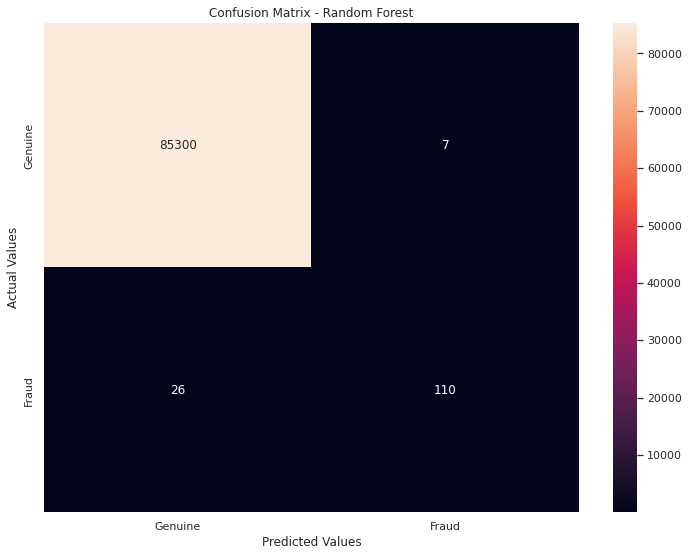

In [ ]:
# Confusion Matrix
confusion_matrix_random_forest = confusion_matrix(test_y, prediction_rf)
# Visualization
ax = plt.subplot()
sns.heatmap(confusion_matrix_random_forest, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

Dựa vào confusion matrix, model Random Forest có accuracy cao. Tuy nhiên chỉ có 0,17% giao dịch là gian lận trong tập dữ liệu này.
Để cân bằng dữ liệu, chúng ta sẽ sử dụng SMOTE để cân bằng lại các class của dữ liệu

### Oversampling with SMOTE

In [ ]:
# Importing SMOTE from imblearn lib
from imblearn.over_sampling import SMOTE
resampled_x, resampled_y = SMOTE().fit_resample(X,Y) # reshaping data

print('X New Shape: ', resampled_x.shape)
print('Y New Shape: ', resampled_y.shape)

X New Shape:  (568630, 29)
Y New Shape:  (568630,)


In [ ]:
# Splitting our resampled data
(train_x,test_x,train_y,test_y) = train_test_split(resampled_x, resampled_y,
                                                  test_size = 0.3, random_state = 42)

# Applying Random Forest Classifier with new resampled data
resampled_random_forest = RandomForestClassifier(n_estimators = 100)
resampled_random_forest.fit(train_x,train_y)

predictions_resampled = resampled_random_forest.predict(test_x)
random_forest_new_score = round(resampled_random_forest.score(test_x,test_y) * 100, 4)
print('Performance: ', random_forest_new_score)

Performance:  99.9883


In [ ]:
# Random Forest Evaluation metrics after oversampling
metrics_random_forest_resampled = [['Accuracy',(accuracy_score(test_y, predictions_resampled))],
                         ['Precision',precision_score(test_y, predictions_resampled)],
                         ['Recall', recall_score(test_y, predictions_resampled)],
                         ['F1_score',f1_score(test_y, predictions_resampled)]]
metric_values_random_forest_resampled = pd.DataFrame(metrics_random_forest_resampled, columns = ['Metrics', 'Results'])
metric_values_random_forest_resampled

,Metrics,Results
0,Accuracy,0.999883
1,Precision,0.999766
2,Recall,1.000000
3,F1_score,0.999883


[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

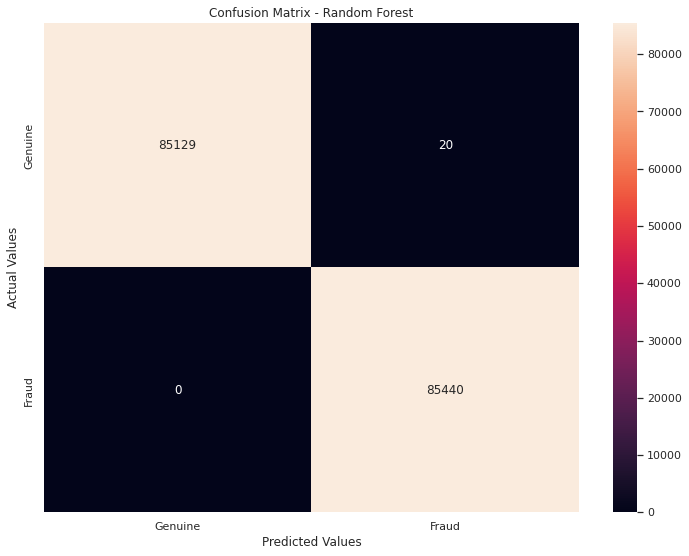

In [ ]:
# Confusion Matrix
confusion_matrix_random_forest_resampled = confusion_matrix(test_y, predictions_resampled)
# Visualization
ax = plt.subplot()
sns.heatmap(confusion_matrix_random_forest_resampled, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

# Kết luận
Sau khi sử dụng SMOTE để oversampling, ta có:
- 85.132 True Positives.
- 17 False Negatives.
- 0 False Positives.
- 85.440 True Negatives.

Ngoài ra:
- Accuracy: 99.99%;
- Precision: 99.98%;
- Recall: 100%;
- F1 Score: 99.99%.

--> mô hình phù hợp để dự đoán gian lận